<a href="https://colab.research.google.com/github/sipra1304/ML_projects/blob/main/Cereberal_Stroke_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams


In [ ]:
data = pd.read_csv('cereberal stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


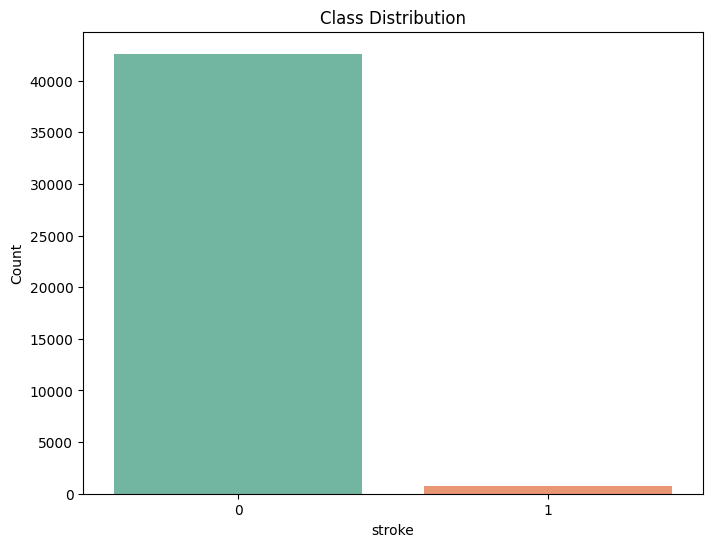

Class Distribution:
0    42617
1      783
Name: stroke, dtype: int64


In [ ]:
# Count the occurrences of each class in the target variable
class_counts = data['stroke'].value_counts()

# Plot a bar graph to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=data, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('stroke')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Class Distribution:")
print(class_counts)

In [ ]:
data[['id','hypertension', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']] = data[['id','hypertension', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']].apply(pd.to_numeric, errors='coerce')
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
median_values = data[['hypertension', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']].median()
data.fillna(median_values, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# First Snippet
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoder = LabelEncoder()

data_encoded = {}
for col in categorical_columns:
    data_encoded[col] = label_encoder.fit_transform(data[col])

data_encoded

NameError: ignored

In [ ]:
cat_columns=['hypertension', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']

for i in cat_columns:
  data_encoded[i]=data[i]
data_encoded['stroke'] = data['stroke']
data_encoded = pd.DataFrame(data_encoded)
#Display sample data
data_encoded.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,age,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,4,0,3,0,3.0,0,95.12,18.0,0
1,1,1,2,1,1,1,58.0,0,87.96,39.2,0
2,0,0,2,1,3,0,8.0,0,110.89,17.6,0
3,0,1,2,0,0,0,70.0,0,69.04,35.9,0
4,1,0,1,0,3,0,14.0,0,161.28,19.1,0


In [ ]:
target = 'stroke'
x= data_encoded.loc[:,data_encoded.columns!=target]
y= data_encoded.loc[:,data_encoded.columns==target]

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

0    42617
1      783
Name: stroke, dtype: int64


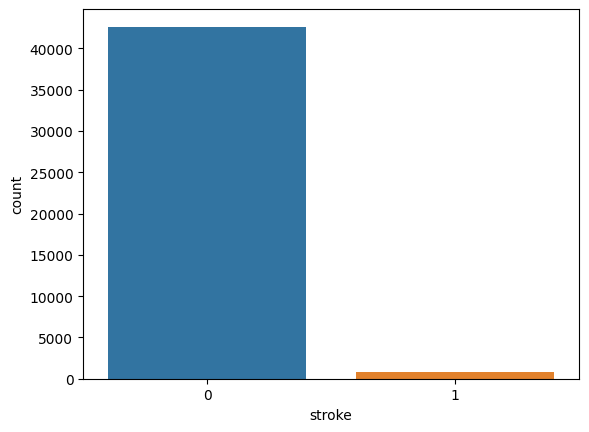

In [ ]:
ax=sns.countplot(x=target, data=data_encoded)
print(data_encoded[target].value_counts())

In [ ]:
y_train[target].value_counts()

0    29832
1      548
Name: stroke, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
y_test_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: LogisticRegression(random_state=42)
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Apply random undersampling to balance the classes:**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Print the class distribution
print("Class distribution:")
for class_label, count in zip(*np.unique(y, return_counts=True)):
    print(f"Class {class_label}: {count} instances")




Class distribution:
Class 0: 42617 instances
Class 1: 783 instances


In [ ]:

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the data
x_resampled, y_resampled = undersampler.fit_resample(x, y)

In [ ]:
# Print the class distribution after undersampling
print("\nClass distribution after undersampling:")
for class_label, count in zip(*np.unique(y_resampled, return_counts=True)):
    print(f"Class {class_label}: {count} instances")



Class distribution after undersampling:
Class 0: 783 instances
Class 1: 783 instances


In [ ]:
x_resampled

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,age,heart_disease,avg_glucose_level,bmi
0,1,1,2,0,2,0,79.0,0,201.49,24.2
1,0,0,2,1,2,0,25.0,0,90.01,26.4
2,0,1,2,1,1,0,68.0,0,109.23,31.3
3,1,1,2,0,0,0,49.0,0,99.39,36.3
4,0,0,2,0,1,0,20.0,0,98.50,30.2
...,...,...,...,...,...,...,...,...,...,...
1561,0,1,2,0,2,0,56.0,0,83.27,32.9
1562,1,1,3,0,3,0,69.0,0,97.36,28.0
1563,0,1,3,1,1,0,80.0,0,75.91,26.7
1564,1,1,2,0,0,1,62.0,1,77.97,31.5


In [ ]:
from sklearn.model_selection import train_test_split
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_n = sc.fit_transform(x_train_n)
x_test_n = sc.transform(x_test_n)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 42)
clf.fit(x_train_n, y_train_n)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
y_pred= clf.predict(x_test_n)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_new = accuracy_score(y_test_n, y_pred)
clf_rep = classification_report(y_test_n, y_pred)

print(f"Model: {clf}")
print(f"Accuracy: {accuracy_new:.2f}")
print("Classification Report:\n", clf_rep)
print("="*75)

Model: LogisticRegression(random_state=42)
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       150
           1       0.79      0.79      0.79       164

    accuracy                           0.78       314
   macro avg       0.78      0.78      0.78       314
weighted avg       0.78      0.78      0.78       314



# **SMOTE** **TECHNIQUE**

In [ ]:
from sklearn.impute import KNNImputer #Imputation
from sklearn.preprocessing import MinMaxScaler#scaling


#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report


# Missing Value Handling


In [ ]:


imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(data_encoded)
data_encoded_new = pd.DataFrame(tab, columns=data_encoded.columns)
data_encoded_new.head()



,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,age,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,95.12,18.0,0.0
1,1.0,1.0,2.0,1.0,1.0,1.0,58.0,0.0,87.96,39.2,0.0
2,0.0,0.0,2.0,1.0,3.0,0.0,8.0,0.0,110.89,17.6,0.0
3,0.0,1.0,2.0,0.0,0.0,0.0,70.0,0.0,69.04,35.9,0.0
4,1.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,161.28,19.1,0.0


In [ ]:
target = 'stroke'
x= data_encoded.loc[:,data_encoded.columns!=target]
y= data_encoded.loc[:,data_encoded.columns==target]

# Scaling using MinMax Scaler

In [ ]:
mm = MinMaxScaler()
x = mm.fit_transform(x)

In [ ]:

from sklearn.model_selection import train_test_split#splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [knn,nb,dt,rf]

for model in models:
    print("MODEL NAME:",model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.09      0.00      0.01       229

    accuracy                           0.98     13020
   macro avg       0.54      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     12791
           1       0.07      0.34      0.11       229

    accuracy                           0.91     13020
   macro avg       0.53      0.63      0.53     13020
weighted avg       0.97      0.91      0.94     13020

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12791
           1       0.06      0.09      0.07       229

    accuracy                           0.96     13020
   macro avg       0.52      0.53      0.52     13020
weighted avg

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-117-090d33f52ba2>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
x_os,y_os = os.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn1 = KNeighborsClassifier()
nb1 = GaussianNB()
dt1 = DecisionTreeClassifier()
rf1 = RandomForestClassifier()

models = [knn1,nb1,dt1,rf1]

for model in models:
    print("MODEL NAME:",model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.99      0.87      0.93     12883
           1       0.88      0.99      0.93     12688

    accuracy                           0.93     25571
   macro avg       0.93      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     12883
           1       0.75      0.79      0.77     12688

    accuracy                           0.77     25571
   macro avg       0.77      0.77      0.77     25571
weighted avg       0.77      0.77      0.77     25571

MODEL NAME: DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12883
           1       0.97      0.98      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.97      0.97     25571
weighted avg       0.97      0.97      0.97     25571

MODEL NAME: RandomForestClassifier()


<ipython-input-119-786de562e4bf>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12883
           1       0.96      0.98      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.97      0.97     25571
weighted avg       0.97      0.97      0.97     25571



# UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=1)
x_us,y_us = us.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x_us,y_us,test_size=0.3,random_state=1)

In [ ]:
knn2 = KNeighborsClassifier()
nb2 = GaussianNB()
dt2 = DecisionTreeClassifier()
rf2 = RandomForestClassifier()

models = [knn2,nb2,dt2,rf2]

for model in models:
    print("MODEL NAME:",model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       229
           1       0.76      0.70      0.73       241

    accuracy                           0.74       470
   macro avg       0.74      0.74      0.74       470
weighted avg       0.74      0.74      0.74       470

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       229
           1       0.78      0.72      0.75       241

    accuracy                           0.75       470
   macro avg       0.75      0.75      0.75       470
weighted avg       0.76      0.75      0.75       470

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       229
           1       0.72      0.69      0.71       241

    accuracy                           0.70       470
   macro avg       0.70      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-121-47af70988d0c>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.74      0.76      0.75       229
           1       0.76      0.75      0.75       241

    accuracy                           0.75       470
   macro avg       0.75      0.75      0.75       470
weighted avg       0.75      0.75      0.75       470



# Combining Oversampling and Undersampling

In [ ]:


from imblearn.combine import SMOTEENN

sample = SMOTEENN()
x_over,y_over = sample.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.3,random_state=1)



In [ ]:
knn3 = KNeighborsClassifier()
nb3 = GaussianNB()
dt3 = DecisionTreeClassifier()
rf3 = RandomForestClassifier()

models = [knn3,nb3,dt3,rf3]

for model in models:
    print("MODEL NAME:",model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     11245
           1       0.96      1.00      0.98     12131

    accuracy                           0.97     23376
   macro avg       0.98      0.97      0.97     23376
weighted avg       0.98      0.97      0.97     23376

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     11245
           1       0.81      0.81      0.81     12131

    accuracy                           0.80     23376
   macro avg       0.80      0.80      0.80     23376
weighted avg       0.80      0.80      0.80     23376

MODEL NAME: DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11245
           1       0.97      0.98      0.97     12131

    accuracy                           0.97     23376
   macro avg       0.97      0.97      0.97     23376
weighted avg       0.97      0.97      0.97     23376

MODEL NAME: RandomForestClassifier()


<ipython-input-123-b19f1000e07b>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11245
           1       0.98      0.99      0.99     12131

    accuracy                           0.99     23376
   macro avg       0.99      0.99      0.99     23376
weighted avg       0.99      0.99      0.99     23376

